In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("covid_19_country_wise_latest.csv")
df.head()

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
#2 and 3
df.set_index("Unnamed: 0", inplace=True)
df.index.name = "index"
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
#4
def clean_column_names(df):
    df.columns = df.columns.str.replace(" ", "_")
    return df
df = clean_column_names(df)
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')

In [7]:
#5
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

In [8]:
#6
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New_cases                 0
New_deaths                0
New_recovered             0
Deaths_/_100_Cases        0
Recovered_/_100_Cases     0
Deaths_/_100_Recovered    0
Confirmed_last_week       0
1_week_change             0
1_week_%_increase         0
WHO_Region                0
dtype: int64

In [9]:
#7
num_unique_countries = df["Country/Region"].nunique()
num_unique_countries

187

In [10]:
#8
duplicate_countries = df["Country/Region"].duplicated().sum()
df.drop_duplicates(subset=["Country/Region"], keep="first", inplace=True)
updated_unique_countries = df["Country/Region"].nunique()
duplicate_countries, updated_unique_countries

(np.int64(0), 187)

In [11]:
#9
mean_cases = df["Confirmed"].mean()
mean_cases

np.float64(88130.935828877)

In [12]:
median_cases = df["Confirmed"].median()
median_cases

np.float64(5059.0)

In [13]:
std_cases = df["Confirmed"].std()
std_cases

np.float64(383318.6638306154)

In [14]:
#10 and 11
df["Deaths"] = pd.to_numeric(df["Deaths"], errors="coerce")

df["Deaths"].fillna(df["Deaths"].mean(), inplace=True)

df["Deaths"].dtype

C:\Users\Wasi Ahmed\AppData\Local\Temp\ipykernel_17088\3945927757.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Deaths"].fillna(df["Deaths"].mean(), inplace=True)


dtype('float64')

In [15]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269.000000,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144.000000,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163.000000,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52.000000,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41.000000,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78.000000,3752,6791,152.0,2.0,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1.000000,8,1,0.0,0.0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483.000000,833,375,10.0,4.0,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean


In [16]:
#12
total_deaths = df["Deaths"].sum()
total_deaths

np.float64(657516.1290322581)

In [17]:
total_recoveries = df["Recovered"].sum()
total_recoveries

np.int64(9468087)

In [18]:
#13
countries_over_million = (df["Confirmed"] > 1_000_000).sum()
countries_over_million

np.int64(3)

In [19]:
#14
df["Recovery_Rate"] = (df["Recovered"] / df["Confirmed"]) * 100
high_recovery_countries = df[df["Recovery_Rate"] > 95]["Country/Region"]
high_recovery_countries.tolist()

['Brunei',
 'Djibouti',
 'Dominica',
 'Grenada',
 'Holy See',
 'Iceland',
 'Malaysia',
 'Mauritius',
 'New Zealand',
 'Norway',
 'Qatar',
 'Taiwan*']

In [20]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region,Recovery_Rate
index,,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269.000000,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,69.486805
1,Albania,4880,144.000000,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe,56.250000
2,Algeria,27973,1163.000000,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa,67.339935
3,Andorra,907,52.000000,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe,88.533627
4,Angola,950,41.000000,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa,25.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78.000000,3752,6791,152.0,2.0,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,35.326240
183,Western Sahara,10,1.000000,8,1,0.0,0.0,0,10.00,80.00,12.50,10,0,0.00,Africa,80.000000
184,Yemen,1691,483.000000,833,375,10.0,4.0,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,49.260792


In [20]:
#15
df.drop(columns=["WHO_Region", "Confirmed"], inplace=True)

df.columns

Index(['Country/Region', 'Deaths', 'Recovered', 'Active', 'New_cases',
       'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'Recovery_Rate'],
      dtype='object')

In [21]:
#16
max_deaths_country = df.loc[df["Deaths"].idxmax(), "Country/Region"]
max_deaths_country

'US'

In [22]:
#17
df_sorted_deaths = df.sort_values(by="Deaths", ascending=False)
df_sorted_deaths.head()

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Recovery_Rate
index,,,,,,,,,,,,,,
173,US,148011.0,1325804,2816444,56336.0,1076.0,27941,3.45,30.90,11.16,3834677,455582,11.88,30.902656
23,Brazil,87618.0,1846641,508116,23284.0,614.0,33728,3.59,75.61,4.74,2118646,323729,15.28,75.608414
177,United Kingdom,45844.0,1437,254427,688.0,7.0,3,15.19,0.48,3190.26,296944,4764,1.60,0.476288
111,Mexico,44022.0,303810,47657,4973.0,342.0,8588,11.13,76.82,14.49,349396,46093,13.19,76.818824
85,Italy,35112.0,198593,12581,168.0,5.0,147,14.26,80.64,17.68,244624,1662,0.68,80.635115


In [23]:
#18
df["Total_cases"] = df["Deaths"] + df["Recovered"] + df["Active"]

In [24]:
df.head()

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Recovery_Rate,Total_cases
index,,,,,,,,,,,,,,,
0,Afghanistan,1269.0,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,69.486805,36263.0
1,Albania,144.0,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,56.250000,4880.0
2,Algeria,1163.0,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,67.339935,27973.0
3,Andorra,52.0,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,88.533627,907.0
4,Angola,41.0,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,25.473684,950.0


In [25]:
#19
df["Death_Rate"] = (df["Deaths"] / df["Total_cases"]) * 100
df[["Country/Region", "Deaths", "Total_cases", "Death_Rate"]].head()

,Country/Region,Deaths,Total_cases,Death_Rate
index,,,,
0,Afghanistan,1269.0,36263.0,3.499435
1,Albania,144.0,4880.0,2.950820
2,Algeria,1163.0,27973.0,4.157581
3,Andorra,52.0,907.0,5.733186
4,Angola,41.0,950.0,4.315789


In [26]:
#20
increasing_cases_low_death = df[(df["1_week_change"] > 0) & (df["Death_Rate"] < 2)]
increasing_cases_low_death[["Country/Region", "Total_cases", "1_week_change", "Death_Rate"]].head()

,Country/Region,Total_cases,1_week_change,Death_Rate
index,,,,
6,Argentina,167416.0,36642,1.827185
7,Armenia,37390.0,2409,1.901578
8,Australia,15303.0,2875,1.091289
10,Azerbaijan,30446.0,2556,1.389345
12,Bahrain,39482.0,2546,0.357125


In [27]:
#21
df_filtered = df[["Country/Region", "Death_Rate"]]
df_filtered.head()

,Country/Region,Death_Rate
index,,
0,Afghanistan,3.499435
1,Albania,2.950820
2,Algeria,4.157581
3,Andorra,5.733186
4,Angola,4.315789


In [28]:
#22
print(df.columns)

Index(['Country/Region', 'Deaths', 'Recovered', 'Active', 'New_cases',
       'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'Recovery_Rate', 'Total_cases', 'Death_Rate'],
      dtype='object')


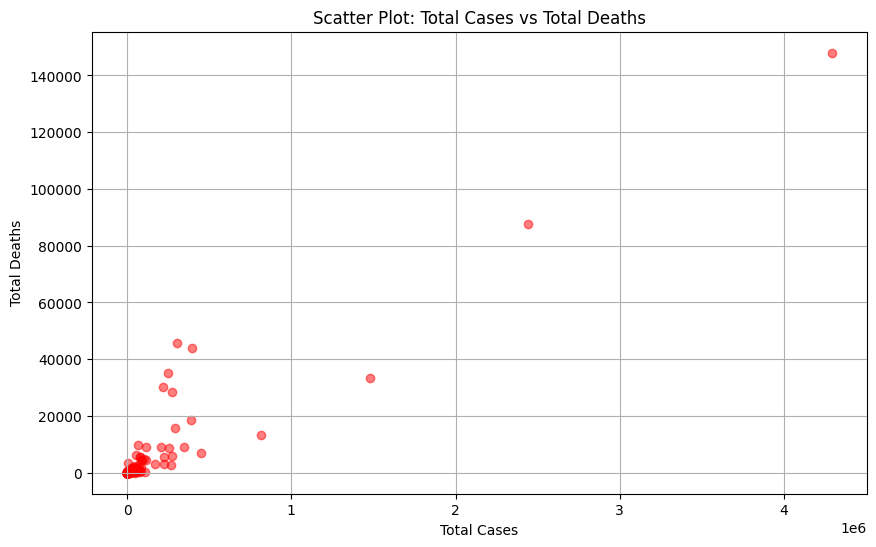

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Total_cases"], df["Deaths"], alpha=0.5, color="red")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Scatter Plot: Total Cases vs Total Deaths")
plt.grid(True)
plt.show()

In [30]:
df.to_csv("Panads 334840.csv")